In [5]:
import data_generation_functions as dgf
import learning_algorithms_functions as laf
import classical_methods_functions as cmf
import simulation_functions as sf
import visualization_functions as vf
import numerical_methods as nm
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


e=np.exp(1)

from sklearn.linear_model import LinearRegression


#database connection for getting the solutions from the database.
try:
    db_address=r"secretary_problem_db.db"

    import sqlite3
    conn = sqlite3.connect(db_address)
    cur=conn.cursor()
except:
    pass

    problem codes:
    -pick_the_best:0
    -minimize_expected_rank:1
    -minimize_expected_square_rank:1.1
    -minimize_expected_cube_rank:1.13
    -minimize_expected_exponential_rank:1.2
    -minimize_expected_distance_to_rank_k:1.5
    -minimize_expected_squared_distance_to_rank_k:1.51
    -minimize_expected_distance_to_rank_median:1.53
    -minimize_expected_squared_distance_to_rank_median:1.54
    -pick_around_median_rose1982:1.6
    -pick_exactly_the_kth_best:2
    -pick_from_the_top_k_best:3
    -pick_odds_or_evens_depending_on_k:4 (k=0 even, k=1 odds)
    -pick_primes:5
    -pick_primes_except_the_last_k:5.1
    -pick_primes_or_from_the_worst_k:5.2
    -pick_primes_from_the_first_half:5.3
    -pick_primes_one_of_top_k_primes:5.4
    -pick_from_the_best_k_or_the_worst_k:6
    -pick_the_divisors_of_N:9

The payoff for the ranks:  [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
Expected Payoff:  -2.5579365079365086
When the relative rank is 2 the thresholds alpha, beta are  (5, 10)


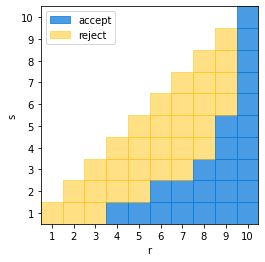

In [6]:
#Expected Rank Minimization: Solution for N=10 items

problem=1
N=10
k=1

U=cmf.create_payoff_array(N,problem,k)
print('The payoff for the ranks: ',U)

D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
print('Expected Payoff: ', E[0][0])

s=2
vf.plot_decision_graph(D,if_latex=True) # For N>50 plotting takes time
print('When the relative rank is {} the thresholds alpha, beta are '.format(s),nm.find_threshold_interval(D,s))

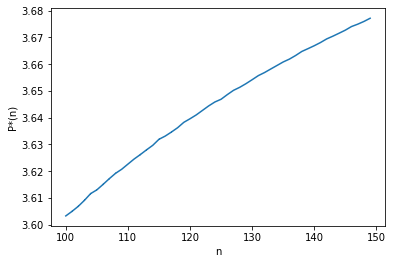

In [30]:
#Expected Rank Minimization: Solution for N=10 items

problem=1
k=0
Ns=[N for N in range(100,150)]

nm.calculate_optimal_payoffs_for_multiple_N(Ns,problem,k)
nm.plot_winning_probabilities(Ns, problem, k)

Pick Even Ranks
n is even 0.792135614270185
n is odd 0.7749216152369418
Pick Odd Ranks
n is even 0.7921356142701849
n is odd 0.8060362789801765


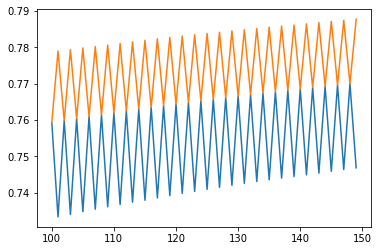

In [32]:
#Case of picking odd/even rank

problem=4
Ns=[N for N in range(100,150)]

for k in [0,1]:
    if k==0:
        print('Pick Even Ranks')
    else:
        print('Pick Odd Ranks')
    q="select n,p_alpha p from optimal_payoffs \
    where problem = {} and k = {} \
    order by n".format(problem,k)
    df=pd.read_sql_query(q,conn)
    df=df[df['n'].isin(Ns)]

    x=[i for i in df['n']]
    y=[np.abs(i) for i in df['p']]
    plt.plot(x,y)
    
    x_o, y_o, x_e, y_e=[],[],[],[]
    for i in range(len(x)):
        if x[i]%2==0:
            x_e.append([1/x[i]])
            y_e.append(y[i])
        else:
            x_o.append([1/x[i]])
            y_o.append(y[i])
        
    clf = LinearRegression(fit_intercept=True)
    clf.fit(x_e,y_e)

    b=clf.predict([[0]])[0]
    a=clf.predict([[1]])[0]-b
    print('n is even',b)
    
    clf = LinearRegression(fit_intercept=True)
    clf.fit(x_o,y_o)

    b=clf.predict([[0]])[0]
    a=clf.predict([[1]])[0]-b
    print('n is odd', b)
    
    #plt.xlabel('n')
    #plt.ylabel('P*(n)')
#plt.legend(['Pick Even Ranks','Pick Odd Ranks'])

In [6]:
#get the solutions for alpha_s for available N (q is normalized by N)
q="select * from alphas where problem = {} and k={} and s={}".format(problem,k,s)
df=pd.read_sql_query(q,conn)
df

,problem,k,s,n,alpha,q,p_alpha,p_alpha_minus_1,p_alpha_plus_1
0,1,1,1,100,27,0.265315,-3.603230,-3.603375,-3.607692
1,1,1,1,101,27,0.265366,-3.604924,-3.606329,-3.608172
2,1,1,1,102,27,0.265351,-3.606800,-3.609458,-3.608840
3,1,1,1,103,27,0.265259,-3.609049,-3.612947,-3.609895
4,1,1,1,104,28,0.265149,-3.611573,-3.611899,-3.615558
...,...,...,...,...,...,...,...,...,...
96,1,1,1,196,52,0.262781,-3.716627,-3.716634,-3.717944
97,1,1,1,197,52,0.262786,-3.717249,-3.717607,-3.718222
98,1,1,1,198,52,0.262782,-3.717803,-3.718513,-3.718430
99,1,1,1,199,52,0.262759,-3.718446,-3.719506,-3.718730


In [12]:
#Extrapolate the threshold alpha_s with a function

problem=1
N=10
k=1
s=1
Ns=[N for N in range(100,200)]
func_family='f2' #f1: an+b, f2:ab+b+c/n


y_a,y_l,y_u,y_pol_a,y_aN,y_polN_a=nm.alpha_threshold_finder_for_multiple_N(Ns,problem,k,s)
a,b,c=nm.extrapolate_the_thresholds(Ns,y_polN_a,func_family=func_family)

if func_family=='f1':
    f='{}n {} {}'.format('%.6f' %a,'-' if b < 0 else '+','%.6f' %np.abs(b))
elif func_family=='f2':
    f='{}n {} {} {} {}/n'.format('%.6f' %a,'-' if b < 0 else '+','%.6f' %np.abs(b),
                                 '-' if c < 0 else '+','%.6f' %np.abs(c))
    
print('{}'.format(f))

0.259303n + 0.768415 - 16.054978/n


In [14]:
N=1000
#gilberts formula for the threshold (equation 4 in the thesis)
cmf.fast_classic_secretary_solver(N)

368

In [16]:
#print all nontrivial thresholds for the problem 5th best item

problem=2
k=5
Ns=[i for i in range(100,200)]

func_family='f1'

my_dict_1=nm.print_all_nontrivial_thresholds(Ns,problem,k,rou=6,func_family=func_family)
my_dict_1

{('alpha_3', 'f1'): '0.512670n - 0.513607',
 ('beta_3', 'f1'): '0.723594n - 0.219835',
 ('alpha_4', 'f1'): '0.580888n - 0.004455',
 ('alpha_5', 'f1'): '0.707132n + 0.232513'}

In [18]:
#print thresholds for latex one of top k items with both family of functions
#takes a while to be finished

problem=3
Ns1=[N for N in range(950,1000)]
Ns2=[N for N in range(100,1000)]


if problem == 3:
    df=pd.read_csv('Frank1980Solutions.csv',delimiter=';')
    for k in [i for i in range(1,11)]+[15,20,25]:
    #for k in [10]:
        if_print_k=True
        print('\\hline')
        my_dict_1=nm.print_all_nontrivial_thresholds(Ns1,problem,k,rou=6,func_family='f1')
        my_dict_2=nm.print_all_nontrivial_thresholds(Ns2,problem,k,rou=6,func_family='f2')
        for t, ff in my_dict_1:
            try:
                df_sub=df[(df.k==k) & (df.s==int(t.split('_')[-1]))]
                v='%.4f' % float(df_sub['alpha'].iloc[0].replace(',','.'))
            except:
                v=''
            t0=t.split('_')[0]+'_{'+t.split('_')[1]+'}'
            print('{} & $\{}$ & ${}$ & ${}$ & ${}$ \\\ \\hline'.format(k if if_print_k else '',t0
                                                                       ,my_dict_1[(t,'f1')],my_dict_2[(t,'f2')],v))
            if_print_k=False
            
            
            
elif problem == 2:
    for k in [i for i in range(1,11)]+[15,20,25]:
        print('\\hline')
        if_print_k=True
        my_dict_1=nm.print_all_nontrivial_thresholds(Ns1,problem,k,rou=6,func_family='f1')
        my_dict_2=nm.print_all_nontrivial_thresholds(Ns2,problem,k,rou=6,func_family='f2')
        for t, ff in my_dict_1:
            if not t in ['alpha_1','beta_1'] or not k==2:
                t0=t.split('_')[0]+'_{'+t.split('_')[1]+'}'
                print('{} & $\{}$ & ${}$ & ${}$ \\\ \\hline'.format(k if if_print_k else '',t0
                                                                    ,my_dict_1[(t,'f1')],my_dict_2[(t,'f2')]))
                if_print_k=False
                
elif problem == 1 or problem == 1.1:
    for k in [0]:
        print('\\hline')
        if_print_k=True
        my_dict_1=nm.print_all_nontrivial_thresholds(Ns1,problem,k,rou=4,func_family='f1')
        my_dict_2=nm.print_all_nontrivial_thresholds(Ns2,problem,k,rou=4,func_family='f2')
        for t, ff in my_dict_1:
            if not t in ['alpha_1','beta_1'] or not k==2:
                t0=t.split('_')[0]+'_{'+t.split('_')[1]+'}'
                print('{} & $\{}$ & ${}$ & ${}$ \\\ \\hline'.format(k if if_print_k else '',t0
                                                                    ,my_dict_1[(t,'f1')],my_dict_2[(t,'f2')]))
                if_print_k=False

\hline
1 & $\alpha_{1}$ & $0.367879n - 0.183708$ & $0.367879n - 0.183937 + 0.128331/n$ & $0.3679$ \\ \hline
\hline
2 & $\alpha_{1}$ & $0.346982n - 0.214245$ & $0.346982n - 0.214082 + 0.200058/n$ & $0.3470$ \\ \hline
 & $\alpha_{2}$ & $0.666666n - 0.166192$ & $0.666667n - 0.166647 + 0.219059/n$ & $0.6667$ \\ \hline
\hline
3 & $\alpha_{1}$ & $0.336715n - 0.243113$ & $0.336715n - 0.243876 + 0.245747/n$ & $0.3367$ \\ \hline
 & $\alpha_{2}$ & $0.586781n - 0.204690$ & $0.586781n - 0.205113 + 0.324623/n$ & $0.5868$ \\ \hline
 & $\alpha_{3}$ & $0.774597n - 0.161594$ & $0.774597n - 0.161946 + 0.400340/n$ & $0.7746$ \\ \hline
\hline
4 & $\alpha_{1}$ & $0.330158n - 0.271311$ & $0.330159n - 0.272835 + 0.332187/n$ & $0.3302$ \\ \hline
 & $\alpha_{2}$ & $0.541805n - 0.256840$ & $0.541804n - 0.256455 + 0.297876/n$ & $0.5410$ \\ \hline
 & $\alpha_{3}$ & $0.697057n - 0.200773$ & $0.697058n - 0.202005 + 0.433644/n$ & $0.6971$ \\ \hline
 & $\alpha_{4}$ & $0.829826n - 0.158617$ & $0.829827n - 0.159669 + 0

25 & $\alpha_{1}$ & $0.300587n - 0.730277$ & $0.300586n - 0.723797 - 5.552048/n$ & $0.3008$ \\ \hline
 & $\alpha_{2}$ & $0.370225n - 1.121329$ & $0.370209n - 1.093639 - 11.881503/n$ & $0.3702$ \\ \hline
 & $\alpha_{3}$ & $0.424200n - 1.322205$ & $0.424181n - 1.287308 - 16.034381/n$ & $0.4242$ \\ \hline
 & $\alpha_{4}$ & $0.469910n - 1.437837$ & $0.469886n - 1.395863 - 19.058481/n$ & $0.4699$ \\ \hline
 & $\alpha_{5}$ & $0.510194n - 1.490203$ & $0.510177n - 1.452441 - 21.318147/n$ & $0.5102$ \\ \hline
 & $\alpha_{6}$ & $0.546569n - 1.522686$ & $0.546543n - 1.475143 - 22.654675/n$ & $0.5466$ \\ \hline
 & $\alpha_{7}$ & $0.579922n - 1.531996$ & $0.579884n - 1.472145 - 23.486172/n$ & $0.5799$ \\ \hline
 & $\alpha_{8}$ & $0.610832n - 1.505282$ & $0.610798n - 1.449096 - 23.968450/n$ & $0.6108$ \\ \hline
 & $\alpha_{9}$ & $0.639745n - 1.467527$ & $0.639711n - 1.411213 - 23.971294/n$ & $0.6397$ \\ \hline
 & $\alpha_{10}$ & $0.666972n - 1.419401$ & $0.666934n - 1.359540 - 23.861231/n$ & $0.6670

(-0.0008, 0.0008)

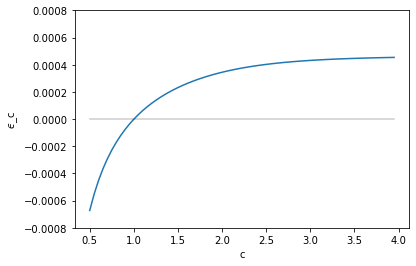

In [33]:
#plot the error for classic secretary with function a/n^c + b

problem,k=2,1
q="select n,p_alpha p from optimal_payoffs \
where problem = {} and k = {} \
order by n".format(problem,k)
df=pd.read_sql_query(q,conn)
Ns=[i for i in range(100,1001,1)]
df=df[df['n'].isin(Ns)]

if problem==2:
    if k==1:
        p1=1/e
    elif k==2:
        p1=1/4
    elif k==3:
        d1=2/(2*np.sqrt(e)+np.sqrt(4*e-6*np.sqrt(e)))
        p1=2*d1*d1*(1-d1)
elif problem==3:
    if k==1:
        p1=1/e
    elif k==2:
        g1=0.3469816097075797772 #gilbert1966 solution of e^(x-1)=2x/3
        p1=g1*(2-g1)
else:
    p1=0
        
my_dict={}

for pow in np.arange(0.5,4,0.05):
    x=[[1/i**pow] for i in df['n']]
    y=[i for i in df['p']]
    w=[i**2 for i in df['n']]

    clf = LinearRegression(fit_intercept=True)
    clf.fit(x,y,sample_weight=w)

    b=clf.predict([[0]])[0]
    a=clf.predict([[1]])[0]-b
    my_dict[pow]=b-p1
    #print(pow,a,b,b-p1)
    
    
fig1, ax1 = plt.subplots(1, 1)
ax1.plot([c for c in my_dict],[(my_dict[c]) for c in my_dict])
ax1.plot([c for c in my_dict],[0 for c in my_dict],'black',alpha=0.2)

ax1.set_xlabel('c')
ax1.set_ylabel('$ϵ$_c')
ax1.set_ylim(-0.0008,0.0008)
